Sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

GP Prior

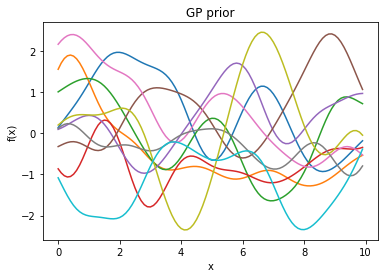

In [2]:
R = 1
g = 1
a = np.ones([R])
Tmin = 0
Tmax = 10

def ard_kernel(x1,x2):
    return g * np.prod([np.exp(-1 * ((x1-x2) ** 2) / (2 * a[r])) for r in range(R)])

def gram_matrix(xs):
    return [[ard_kernel(x1,x2) for x2 in xs] for x1 in xs]

xs = np.arange(Tmin, Tmax, 0.1)
mean = [0 for x in xs]
gram = gram_matrix(xs)

plt_vals = []
plt.title('GP prior')
plt.xlabel('x')
plt.ylabel('f(x)')
for i in range(0, 10):
    ys = np.random.multivariate_normal(mean, gram)
    plt_vals.extend([xs, ys])
plt.plot(*plt_vals)
plt.show()

(102,)
(100, 2) (2, 2) (2,)


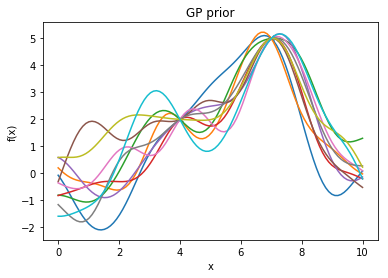

In [4]:
R = 1
g = 1
a = np.ones([R])
Tmin = 0
Tmax = 10
XTrain = np.array([4, 7])
YTrain = np.array([2,5])
xN = 100
fN = 10

def ard_kernel(x1,x2):
    return g * np.prod([np.exp(-1 * ((x1-x2) ** 2) / (2 * a[r])) for r in range(R)])

def gram_matrix(xs):
    return np.array([[ard_kernel(x1,x2) for x2 in xs] for x1 in xs])

xs = np.linspace(Tmin, Tmax, xN)

mean = [0 for x in xs]
print (np.append(xs,XTrain).shape)
gram = gram_matrix(np.append(xs,XTrain))

n = XTrain.shape[0]

Kxx = gram[:xN,:xN]
Kzz = gram[xN:,xN:]
Kxz = gram[:xN,xN:]

KzzInv = np.linalg.inv(Kzz)
print (Kxz.shape, KzzInv.shape, YTrain.shape)
m = Kxz.dot(KzzInv).dot(YTrain)
sig = Kxx-Kxz.dot(KzzInv).dot(Kxz.T)

plt_vals = []
plt.title('GP prior')
plt.xlabel('x')
plt.ylabel('f(x)')
for i in range(0, fN):
    ys = np.random.multivariate_normal(m, sig)
    plt_vals.extend([xs, ys])
plt.plot(*plt_vals)

plt.scatter(XTrain, YTrain, marker='x')

plt.show()